# 영화 관객수 예측

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re # string 에서 처리를 해주는 모델 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("./data/movies_train.csv",encoding = 'cp949')
test = pd.read_csv('./data/movies_test.csv',encoding = 'cp949')

# 배급사 전처리

In [3]:
train['distributor'] = train.distributor.str.replace("(주)", '') # 모든 str에서 (주)를 ''로 바꿔줌 
test['distributor'] = test.distributor.str.replace("(주)", '')

In [4]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,()쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,()쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,()NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스()미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,()NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,()쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,()마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [5]:
def get_dis(x) : # 하나로 묶음 
    if 'CJ' in x or 'CGV' in x :
        return 'CJ' 
    elif '쇼박스' in x :
        return '쇼박스'
    elif 'SK' in x :
        return 'SK'
    elif '리틀빅픽' in x :
        return '리틀빅픽처스'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '에이원' in x :
        return '에이원'
    elif '마인스' in x :
        return '마인스'
    elif '마운틴픽' in x :
        return '마운틴픽처스'
    elif '디씨드' in x :
        return '디씨드'
    elif '드림팩트' in x :
        return '드림팩트'
    elif '메가박스' in x :
        return '메가박스'
    elif '마운틴' in x :
        return '마운틴'
    else :
        return x

In [6]:
train['distributor'] = train.distributor.apply(get_dis)
test['distributor'] = test.distributor.apply(get_dis)

In [7]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,()NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,()NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,마운틴픽처스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [8]:
train.groupby('genre').box_off_num.mean().sort_values() #장르별로 묵어서 box_off_num의 평균을 구하고 정렬 

genre
뮤지컬       6.627000e+03
다큐멘터리     6.717226e+04
서스펜스      8.261100e+04
애니메이션     1.819267e+05
멜로/로맨스    4.259680e+05
미스터리      5.275482e+05
공포        5.908325e+05
드라마       6.256898e+05
코미디       1.193914e+06
SF        1.788346e+06
액션        2.203974e+06
느와르       2.263695e+06
Name: box_off_num, dtype: float64

# 장르별 영화 관객수 평균값으로 랭크 인코딩

In [9]:
train.groupby('genre').box_off_num.mean().sort_values()

genre
뮤지컬       6.627000e+03
다큐멘터리     6.717226e+04
서스펜스      8.261100e+04
애니메이션     1.819267e+05
멜로/로맨스    4.259680e+05
미스터리      5.275482e+05
공포        5.908325e+05
드라마       6.256898e+05
코미디       1.193914e+06
SF        1.788346e+06
액션        2.203974e+06
느와르       2.263695e+06
Name: box_off_num, dtype: float64

In [10]:
train['genre_rank'] = train.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})
test['genre_rank'] = test.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})
#파이썬의 내장 함수인 map()는 여러 개의 데이터를 한 번에 다른 형태로 변환하기 위해서 사용됩니다. 
#따라서, 여러 개의 데이터를 담고 있는 list나 tuple을 대상으로 주로 사용하는 함수입니다.

In [11]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,genre_rank
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,11
1,내부자들,쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,12
2,은밀하게 위대하게,쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,11
3,나는 공무원이다,()NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,9
4,불량남녀,쇼박스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,()NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091,8
596,파파로티,쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438,8
597,살인의 강,마운틴픽처스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475,7
598,악의 연대기,CJ,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525,12


In [12]:
tr_nm_rank = train.groupby('distributor').box_off_num.median()
tr_nm_rank

distributor
() 브릿지웍스           2595.0
() 액티버스엔터테인먼트       610.0
() 영화사조제           1380.0
() 영화제작전원사        39317.0
() 케이알씨지            629.5
                   ...   
필름라인               5100.0
하준사                 600.0
한국YWCA연합회            71.0
홀리가든               1778.5
화앤담이엔티           172196.5
Name: box_off_num, Length: 152, dtype: float64

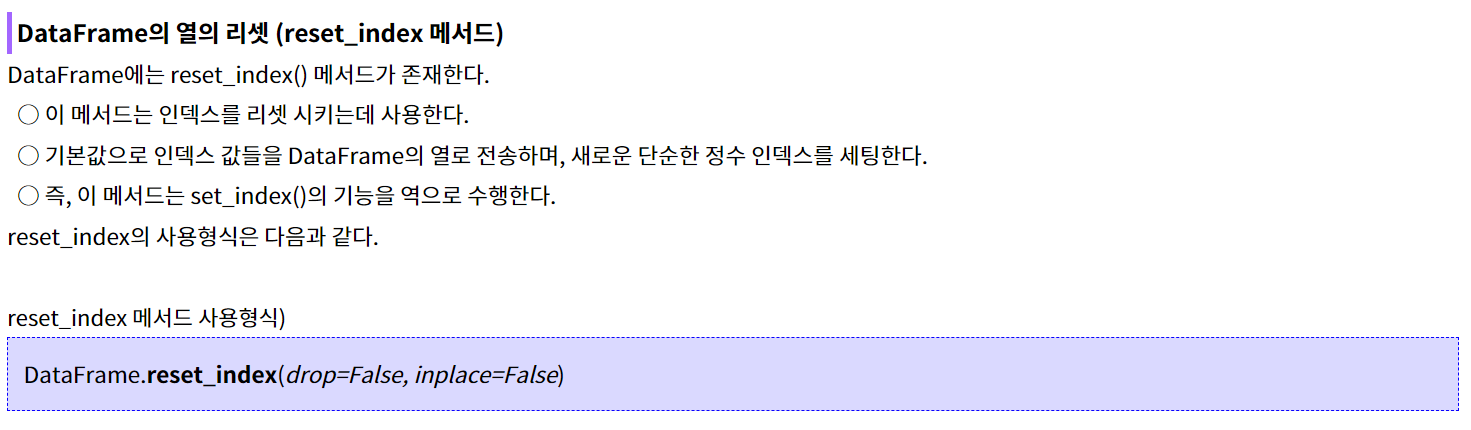

In [13]:
tr_nm_rank = train.groupby('distributor').box_off_num.median().reset_index(name = 'num_rank').sort_values(by = 'num_rank') 
# distributor로 그룹핑한뒤에 중간값을 num_rank로 인덱스를 준후에 오른 차순, 오름 차순 정렬
tr_nm_rank

,distributor,num_rank
125,인피니티엔터테인먼트,2.0
51,고구마공작소,8.0
79,사람과 사람들,42.0
115,위드시네마,46.0
54,나우콘텐츠,54.0
...,...,...
128,전망좋은영화사,1214237.0
120,이십세기폭스코리아(),1422844.0
83,쇼박스,2138560.0
105,영구아트무비,2541603.0


In [14]:
tr_nm_rank['num_rank'] = [i + 1 for i in range(tr_nm_rank.shape[0])]
tr_nm_rank

,distributor,num_rank
125,인피니티엔터테인먼트,1
51,고구마공작소,2
79,사람과 사람들,3
115,위드시네마,4
54,나우콘텐츠,5
...,...,...
128,전망좋은영화사,148
120,이십세기폭스코리아(),149
83,쇼박스,150
105,영구아트무비,151


In [15]:
train = pd.merge(train, tr_nm_rank, how = 'left')

In [16]:
test = pd.merge(test, tr_nm_rank, how = 'left')

In [17]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,genre_rank,num_rank
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,11,138
1,내부자들,쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,12,150
2,은밀하게 위대하게,쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,11,150
3,나는 공무원이다,()NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,9,145
4,불량남녀,쇼박스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,9,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,()NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091,8,145
596,파파로티,쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438,8,150
597,살인의 강,마운틴픽처스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475,7,47
598,악의 연대기,CJ,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525,12,146


In [18]:
test.fillna(0, inplace = True)

# 모델링 데이터 구성
### 타겟 값인 관객수를 로그변환
### 상영등급은 더미 변수
### 출연 배우 수는 로그변환

In [19]:
!pip install xgboost

In [20]:
!pip install lightgbm

In [21]:
!pip install catboost

In [22]:
!pip install ngboost

In [23]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 
# 직렬로 합쳐진 모델
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# XGBM에서 좀 약한 것 
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from ngboost import NGBRegressor

In [24]:
X = train[['num_rank', 'time', 'num_staff', 'num_actor', 'genre_rank', 'screening_rat']]
y = np.log1p(train.box_off_num) # train에서 box_off_num을 로그씌워줌 

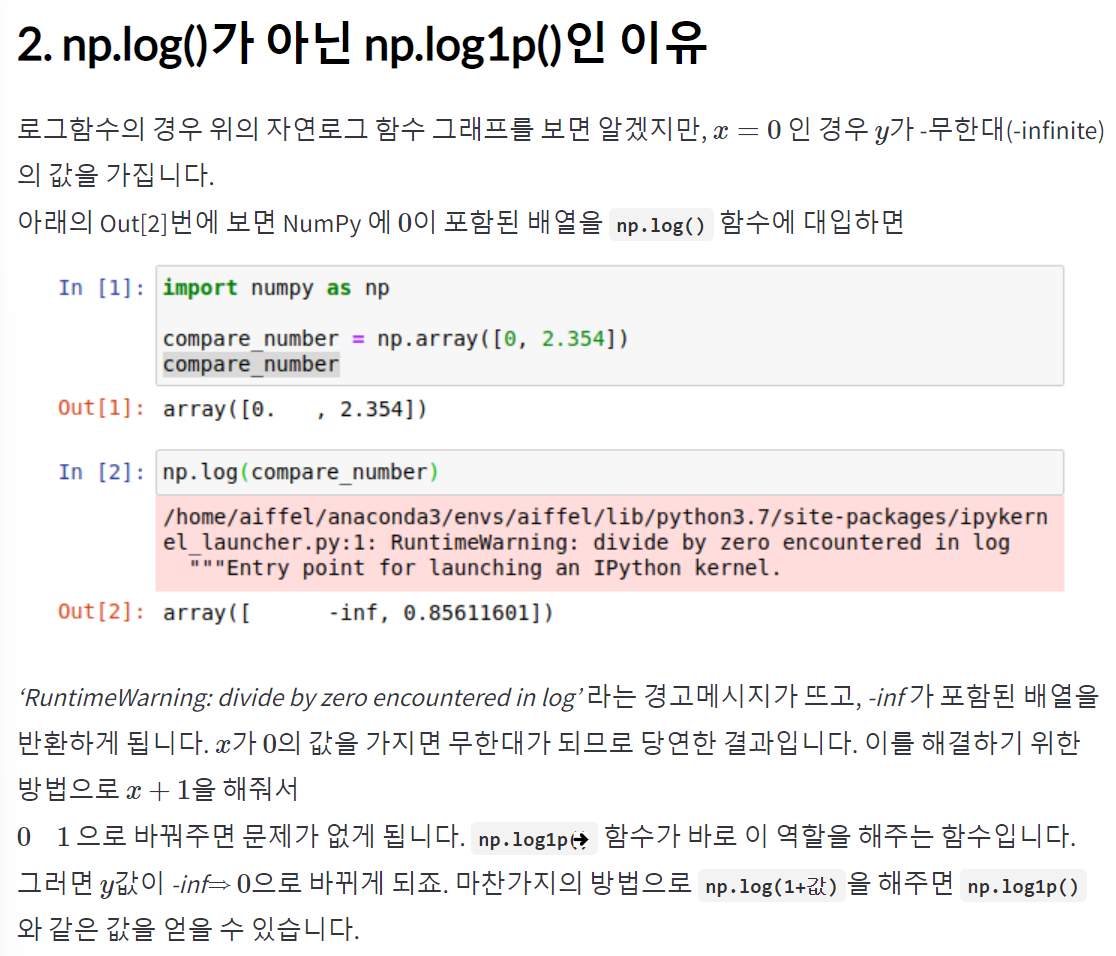

In [25]:
X

,num_rank,time,num_staff,num_actor,genre_rank,screening_rat
0,138,96,91,2,11,청소년 관람불가
1,150,130,387,3,12,청소년 관람불가
2,150,123,343,4,11,15세 관람가
3,145,101,20,6,9,전체 관람가
4,150,108,251,2,9,15세 관람가
...,...,...,...,...,...,...
595,145,111,510,7,8,청소년 관람불가
596,150,127,286,6,8,15세 관람가
597,47,99,123,4,7,청소년 관람불가
598,146,102,431,4,12,15세 관람가


In [26]:
y

0      10.060449
1      15.771725
2      15.755558
3      12.291640
4      13.088575
         ...    
595    14.204231
596    14.355762
597     7.814400
598    14.600565
599    15.784933
Name: box_off_num, Length: 600, dtype: float64

In [27]:
X = pd.get_dummies(columns = ['screening_rat'], data = X)

In [28]:
X

,num_rank,time,num_staff,num_actor,genre_rank,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,138,96,91,2,11,0,0,0,1
1,150,130,387,3,12,0,0,0,1
2,150,123,343,4,11,0,1,0,0
3,145,101,20,6,9,0,0,1,0
4,150,108,251,2,9,0,1,0,0
...,...,...,...,...,...,...,...,...,...
595,145,111,510,7,8,0,0,0,1
596,150,127,286,6,8,0,1,0,0
597,47,99,123,4,7,0,0,0,1
598,146,102,431,4,12,0,1,0,0


In [51]:
X['num_actor'] = np.log1p(X['num_actor'])

In [52]:
target = test[['num_rank', 'time', 'num_staff', 'num_actor', 'genre_rank', 'screening_rat']]

In [53]:
target = pd.get_dummies(columns = ['screening_rat'], data = target)

In [54]:
target['num_actor'] = np.log1p(target['num_actor'])

In [33]:
kf = KFold(n_splits =  10, shuffle = True, random_state = 42 ) 
# random_state 는 크게 중요 x
#kfold : 데이터 셋이 제한적일떄 validation set을 10개로 나눠서 10번의 학습과 검증을 해주는것 

In [55]:
gbm = GradientBoostingRegressor(random_state = 42)

In [58]:
rmse_list = []
gb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    print(tr_x)
    print(val_x)
    break
    gbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in gbm.predict(val_x)])
    # x가 0보다 작으면 0을 넣고, 아니면 x를 대입 
    sub_pred = np.expm1([0 if x < 0 else x for x in gbm.predict(target)])
    # test set을 예측한값 정답값을 모름 
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    gb_pred += (sub_pred / 10) # 각각 모델의 sub_pred 들 10개의 평균을 구함 

     num_rank  time  num_staff  num_actor  genre_rank  screening_rat_12세 관람가  \
0         138    96         91   0.741276          11                      0   
1         150   130        387   0.869742          12                      0   
3         145   101         20   1.080418           9                      0   
4         150   108        251   0.741276           9                      0   
5         138   113        262   0.959135           9                      0   
..        ...   ...        ...        ...         ...                    ...   
593        46    97          5   0.869742           6                      0   
594        47    94         37   1.026672           9                      0   
597        47    99        123   0.959135           7                      0   
598       146   102        431   0.959135          12                      0   
599       146   120        363   1.026672          11                      0   

     screening_rat_15세 관람가  screening_r

In [59]:
np.mean(rmse_list)

nan

In [60]:
ngb = NGBRegressor(random_state = 518)

In [61]:
rmse_list = []
ngb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    ngb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in ngb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in ngb.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    ngb_pred += (sub_pred / 10)
    # 10번씩 테스트 

[iter 0] loss=2.6200 val_loss=0.0000 scale=1.0000 norm=2.9523
[iter 100] loss=1.9644 val_loss=0.0000 scale=2.0000 norm=2.7260
[iter 200] loss=1.5825 val_loss=0.0000 scale=2.0000 norm=2.1835
[iter 300] loss=1.4500 val_loss=0.0000 scale=1.0000 norm=1.0474
[iter 400] loss=1.3739 val_loss=0.0000 scale=0.5000 norm=0.5079
[iter 0] loss=1.3985 val_loss=0.0000 scale=1.0000 norm=1.0638
[iter 100] loss=1.3236 val_loss=0.0000 scale=1.0000 norm=1.0040
[iter 200] loss=1.2799 val_loss=0.0000 scale=1.0000 norm=0.9805
[iter 300] loss=1.2484 val_loss=0.0000 scale=1.0000 norm=0.9653
[iter 400] loss=1.2203 val_loss=0.0000 scale=0.5000 norm=0.4756
[iter 0] loss=1.2085 val_loss=0.0000 scale=1.0000 norm=0.9442
[iter 100] loss=1.1581 val_loss=0.0000 scale=1.0000 norm=0.9127
[iter 200] loss=1.1393 val_loss=0.0000 scale=0.5000 norm=0.4514
[iter 300] loss=1.1204 val_loss=0.0000 scale=0.5000 norm=0.4462
[iter 400] loss=1.1001 val_loss=0.0000 scale=0.2500 norm=0.2204
[iter 0] loss=1.1591 val_loss=0.0000 scale=1.0

In [62]:
np.mean(rmse_list)

1442956.0531583575

In [63]:
lgbm = LGBMRegressor(random_state = 518)

In [64]:
rmse_list = []
lgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    lgbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    lgb_pred += (sub_pred / 10)

In [65]:
np.mean(rmse_list)

1155679.240289382

In [66]:
xgb = XGBRegressor(random_state = 518)

In [67]:
rmse_list = []
xgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    xgb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in xgb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in xgb.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    xgb_pred += (sub_pred / 10)

In [68]:
cat = CatBoostRegressor(random_state = 518, silent = True)

In [69]:
rmse_list = []
cat_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    cat.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in cat.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in cat.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    cat_pred += (sub_pred / 10)

In [70]:
rf = RandomForestRegressor(random_state = 518)

In [71]:
rmse_list = []
rf_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in rf.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in rf.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    rf_pred += (sub_pred / 10)

In [72]:
np.mean(rmse_list)

870545.6600362035

In [73]:
(xgb_pred + cat_pred + lgb_pred + rf_pred + gb_pred + ngb_pred) / 6
# 전체적으로 평균을 내버림 

array([1.08409786e+06, 4.61872805e+05, 3.69774764e+05, 8.50417699e+05,
       1.71004383e+06, 3.34689346e+01, 1.82194445e+03, 5.67053469e+01,
       1.31373127e+03, 2.74752491e+02, 8.63673319e+04, 4.48371482e+05,
       2.93167396e+02, 1.63827384e+03, 1.86437583e+05, 1.28246100e+06,
       1.77326974e+03, 1.16873871e+06, 3.40786560e+04, 7.45457382e+04,
       6.43530013e+01, 1.51978082e+03, 7.85142956e+03, 1.87786589e+02,
       1.26986774e+02, 2.79600757e+05, 1.20141108e+03, 2.32096193e+05,
       3.81414983e+03, 3.48467940e+01, 7.34274978e+05, 7.61812156e+04,
       2.67275654e+03, 2.87281384e+03, 2.45601718e+03, 3.22844546e+03,
       1.53753887e+03, 1.97355810e+03, 2.44536083e+03, 1.73358089e+01,
       6.12245921e+01, 5.30160916e+04, 3.50871380e+05, 1.73906453e+05,
       2.35378279e+05, 3.92734651e+05, 6.93667313e+01, 8.27163821e+01,
       5.85876461e+04, 1.60607665e+02, 8.11036114e+02, 8.86203305e+05,
       2.72636537e+03, 2.98026846e+05, 2.99748457e+05, 2.57594147e+02,
      